# Solución Laboratorio 02 Aprendizaje No Supervizado

## Integrantes:
- Marco Josué Fura Mendoza
- Marcos Esteban Reiman Durán

In [284]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.metrics import pairwise_distances, silhouette_score
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift,estimate_bandwidth,DBSCAN

In [285]:
dataset = sm.datasets.get_rdataset("USArrests", "datasets")

In [286]:
df_usa_arrests = dataset.data

### 1. Realizar el analisis de componentes principales al conjunto de Datos

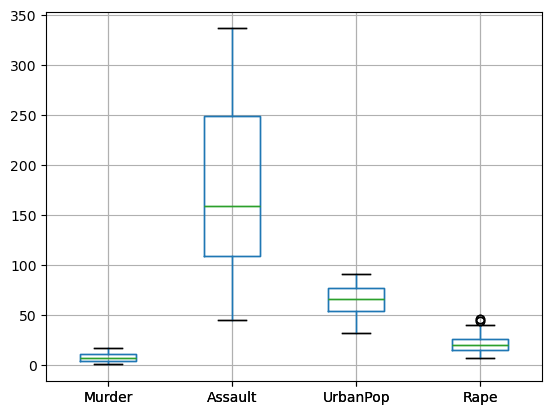

In [288]:
df_usa_arrests.boxplot()
plt.show()

In [289]:
df_usa_arrests_scaled = pd.DataFrame(
    scale(df_usa_arrests), columns=df_usa_arrests.columns
)

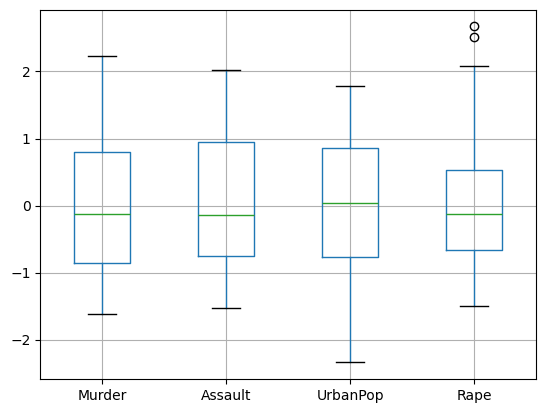

In [290]:
df_usa_arrests_scaled.boxplot()
plt.show()

In [291]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_usa_arrests_scaled)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps["pca"]

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data=modelo_pca.components_, columns=df_usa_arrests_scaled.columns, index=["PC1", "PC2", "PC3", "PC4"]
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [292]:
print("Porcentaje de varianza explicada por cada componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[0.62006039 0.24744129 0.0891408  0.04335752]


Podemos ver que con los 2 primeros componentes podemos explicar aproximadamente el 86% de la variabilidad de los datos, por lo que trabajaremos con ellos.

In [293]:
proyecciones = pca_pipe.transform(X=df_usa_arrests_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns=["PC1", "PC2", "PC3", "PC4"],
    index=df_usa_arrests_scaled.index,
)
proyecciones.head(10)

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


### 2. Agrupar los datos utilizando la técnica MeanShift

#### a) Indique como especificó (ajusto) los hiperparámetros de esta técnica y obtenga los grupos considerando al menos tres conjuntos diferentes

In [294]:
bandwidth_1 = estimate_bandwidth(df_usa_arrests_scaled, quantile=0.25)
bandwidth_2 = estimate_bandwidth(df_usa_arrests_scaled, quantile=0.225)
bandwidth_3 = estimate_bandwidth(df_usa_arrests_scaled, quantile=0.2)

Aquí usamos la función estimate_bandwidth para estimar el ancho de banda, a mayor quantile, mayor ancho de banda. Luego ajustamos el modelo con el ancho de banda estimado y obtenemos los grupos.
Esta función nos permite poder ir probando el ancho de banda con valores entre 0 y 1, y lo calcula obteniendo el promedio de las distancias de los puntos más cercanos de cada uno basándose en el porcentage otorgado por el quantile.

In [295]:
print("Bandwidth 1: ", bandwidth_1)
print("Bandwidth 2: ", bandwidth_2)
print("Bandwidth 3: ",bandwidth_3)

Bandwidth 1:  1.7012684143098349
Bandwidth 2:  1.6433240951131445
Bandwidth 3:  1.5724117199987007


In [296]:
clust_ms1 = MeanShift(bandwidth=bandwidth_1).fit(df_usa_arrests_scaled)
clust_ms2 = MeanShift(bandwidth=bandwidth_2).fit(df_usa_arrests_scaled)
clust_ms3 = MeanShift(bandwidth=bandwidth_3).fit(df_usa_arrests_scaled)
y_ms1 = clust_ms1.labels_
y_ms2= clust_ms2.labels_
y_ms3 = clust_ms3.labels_
print(y_ms1)
print(y_ms2)
print(y_ms3)
df_usa_arrests_scaled_ms = df_usa_arrests_scaled.copy()
# agregar resultado de MeanShift a dataframe
df_usa_arrests_scaled_ms["MS1"] = y_ms1
print('Número de Grupos: ',len(np.unique(y_ms1)))
df_usa_arrests_scaled_ms["MS2"] = y_ms2
print('Número de Grupos: ',len(np.unique(y_ms2)))
df_usa_arrests_scaled_ms["MS3"] = y_ms3
print('Número de Grupos: ',len(np.unique(y_ms3)))
print(df_usa_arrests_scaled_ms)

[1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 2 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]
[1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]
[2 3 1 2 1 1 0 1 2 2 0 0 1 0 0 0 0 2 0 2 0 1 0 2 1 0 0 3 0 1 1 1 2 0 0 0 1
 0 0 2 0 2 1 0 0 1 1 0 0 0]
Número de Grupos:  3
Número de Grupos:  3
Número de Grupos:  4
      Murder   Assault  UrbanPop      Rape  MS1  MS2  MS3
0   1.255179  0.790787 -0.526195 -0.003451    1    1    2
1   0.513019  1.118060 -1.224067  2.509424    2    2    3
2   0.072361  1.493817  1.009122  1.053466    1    1    1
3   0.234708  0.233212 -1.084492 -0.186794    0    0    2
4   0.281093  1.275635  1.776781  2.088814    1    1    1
5   0.025976  0.402909  0.869548  1.883901    1    1    1
6  -1.040880 -0.736484  0.799761 -1.092723    0    0    0
7  -0.437875  0.815030  0.450825 -0.585834    0    0    1
8   1.765415  1.990786  1.009122  1.150530    1    1    2
9   2.229265  0.487757 -0.386621  0.492653    1 

#### b) Visualizar los grupos a partir de las primeras dos componentes principales.

In [297]:
colors = {-1: "gray", 0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "violet"}

color_ms1 = df_usa_arrests_scaled_ms.MS1.map(colors)
color_ms2= df_usa_arrests_scaled_ms.MS2.map(colors)
color_ms3 = df_usa_arrests_scaled_ms.MS3.map(colors)

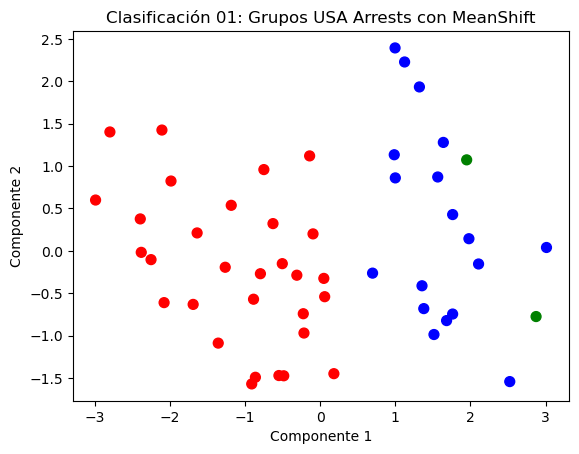

In [298]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_ms1)
plt.title("Clasificación 01: Grupos USA Arrests con MeanShift")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

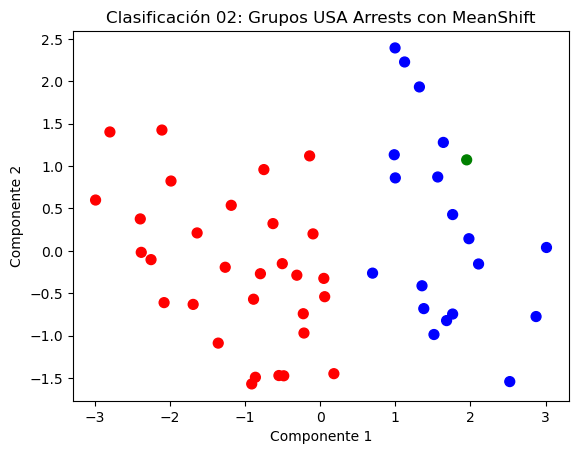

In [299]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_ms2)
plt.title("Clasificación 02: Grupos USA Arrests con MeanShift")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

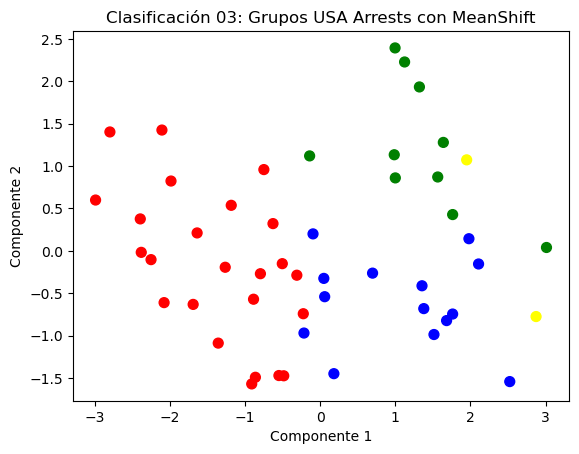

In [300]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_ms3)
plt.title("Clasificación 03: Grupos USA Arrests con MeanShift")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

#### c) En caso de tener diferentes configuraciones de grupos escoja uno. Justifique su elección

In [301]:
def obtener_within_cluster(observaciones, labels):
    distancias_totales_cluster = []
    for index_cluster in range(0, max(labels) + 1):
        distancias_por_cluster = pairwise_distances(
            X=observaciones[labels == index_cluster], metric="euclidean"
        )
        distancias_totales_cluster.append(distancias_por_cluster.sum())
    return sum(distancias_totales_cluster)
def obtener_dispersion_por_cluster(observaciones, labels):
    distancias_totales_cluster = []
    for index_cluster in range(0, max(labels) + 1):
        distancias_por_cluster = pairwise_distances(
            X=observaciones[labels == index_cluster], metric="euclidean"
        )
        distancias_totales_cluster.append(distancias_por_cluster.sum())
    return distancias_totales_cluster

In [302]:
score = silhouette_score(df_usa_arrests_scaled, y_ms1)
print("Silhouette Score Clasificación 01: ", score)
score = silhouette_score(df_usa_arrests_scaled, y_ms2)
print("Silhouette Score Clasificación 02: ", score)
score = silhouette_score(df_usa_arrests_scaled, y_ms3)
print("Silhouette Score Clasificación 03: ", score)

Silhouette Score Clasificación 01:  0.33480759897254075
Silhouette Score Clasificación 02:  0.34863679190476177
Silhouette Score Clasificación 03:  0.2692901789521354


En vista que tenemos que clasificar los datos en 3 grupos o más y viendo que el bandwidth estimado con un quantile de 0.225 nos da 3 grupos y su silhuete score es el mayor, nos quedaremos con la Clasificación 02.

#### d) Interprete los grupos finalmente obtenidos en términos de centro y dispersión de cada grupo.

In [303]:
print('Promedios o Centroides: ',clust_ms1.cluster_centers_)
print("WC: ", obtener_within_cluster(df_usa_arrests_scaled, y_ms2))
print('Dispersión por Cluster: ',obtener_dispersion_por_cluster(df_usa_arrests_scaled, y_ms2))

Promedios o Centroides:  [[-0.56775293 -0.60509036 -0.00418723 -0.37531353]
 [ 0.93048397  0.77866596  0.14376154  0.5041568 ]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]]
WC:  2285.2393872242505
Dispersión por Cluster:  [1596.7395787013695, 688.499808522881, 0.0]


De aquí podemos ver que el último cluster posee un único elemento, es por eso que su dispersión es 0. Podríamos clasificarlo como ruido pero mejor exploraremos los resultados de otros modelos.

### 3. DBScan

a) Indique como especificó (ajusto) los hiperparámetros de esta técnica y obtenga los grupos considerando al menos tres conjuntos diferentes.

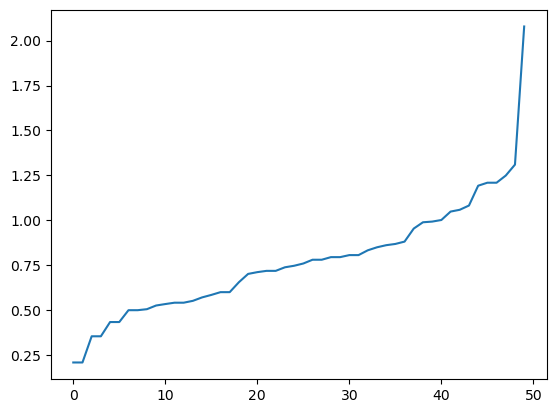

In [304]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Asumiendo df_usa_arrests_scaled como tus datos escalados
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_usa_arrests_scaled)
distances, indices = neighbors_fit.kneighbors(df_usa_arrests_scaled)

# Ordenar y plotear las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

Encontramos el epsilon óptimo por el Knee Method, en donde tratamos de encontrar un punto de inflexión en la gráfica de las distancias de los puntos más cercanos. 

In [305]:
dbscan1 = DBSCAN(eps=1.25, min_samples=2).fit(df_usa_arrests_scaled)
dbscan2 = DBSCAN(eps=1.225, min_samples=2).fit(df_usa_arrests_scaled)
dbscan3 = DBSCAN(eps=1.175, min_samples=2).fit(df_usa_arrests_scaled)
y_dbs1 = dbscan1.labels_
y_dbs2 = dbscan2.labels_
y_dbs3 = dbscan3.labels_
print(y_dbs1)
print(y_dbs2)
print(y_dbs3)
df_usa_arrests_scaled_dbs = df_usa_arrests_scaled.copy()
# agregar resultado de MeanShift a dataframe
df_usa_arrests_scaled_dbs["DBS1"] = y_dbs1
has_ruido1 = -1 in y_dbs1
has_ruido2= -1 in y_dbs2
has_ruido3= -1 in y_dbs3
y_dbs1_grupos = np.array([n for n in y_dbs1 if n != -1])
y_dbs2_grupos = np.array([n for n in y_dbs2 if n != -1])
y_dbs3_grupos = np.array([n for n in y_dbs3 if n != -1])
print("Número de Grupos: ", len(np.unique(y_dbs1_grupos)),' y ',f'{"Con ruido" if has_ruido1 else "Sin ruido"}')
df_usa_arrests_scaled_dbs["DBS2"] = y_dbs2
print("Número de Grupos: ", len(np.unique(y_dbs2_grupos)),' y ',f'{"Con ruido" if has_ruido2 else "Sin ruido"}')
df_usa_arrests_scaled_dbs["DBS3"] = y_dbs3
print("Número de Grupos: ", len(np.unique(y_dbs3_grupos)),' y ',f'{"Con ruido" if has_ruido3 else "Sin ruido"}')
print(df_usa_arrests_scaled_dbs)

[ 0 -1  1  1  2  1  1  1 -1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0
  1  1  1  2  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]
[ 0 -1  1  1  2 -1  1  1 -1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0
  1  1  1  2  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]
[ 0 -1  1  2 -1 -1  2 -1 -1  0  2  2  1  2  2  2  2  0  2  1  2  1  2  0
  2  2  2 -1  2  2  1  1  0  2  2  2  2  2  2  0  2  0  1  2  2  2  2  2
  2  2]
Número de Grupos:  3  y  Con ruido
Número de Grupos:  3  y  Con ruido
Número de Grupos:  3  y  Con ruido
      Murder   Assault  UrbanPop      Rape  DBS1  DBS2  DBS3
0   1.255179  0.790787 -0.526195 -0.003451     0     0     0
1   0.513019  1.118060 -1.224067  2.509424    -1    -1    -1
2   0.072361  1.493817  1.009122  1.053466     1     1     1
3   0.234708  0.233212 -1.084492 -0.186794     1     1     2
4   0.281093  1.275635  1.776781  2.088814     2     2    -1
5   0.025976  0.402909  0.869548  1.883901     1    -1    -1
6  -1.

### b) Visualizar los grupos a partir de las primeras dos componentes principales

In [306]:
colors = {-1: "gray", 0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "violet"}

color_dbs1 = df_usa_arrests_scaled_dbs.DBS1.map(colors)
color_dbs2 = df_usa_arrests_scaled_dbs.DBS2.map(colors)
color_dbs3 = df_usa_arrests_scaled_dbs.DBS3.map(colors)

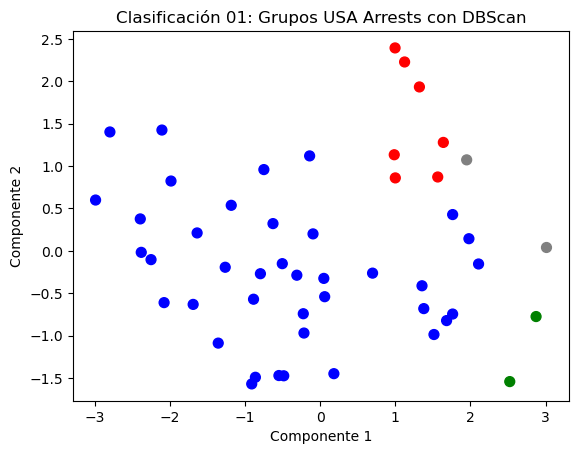

In [307]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_dbs1)
plt.title("Clasificación 01: Grupos USA Arrests con DBScan")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

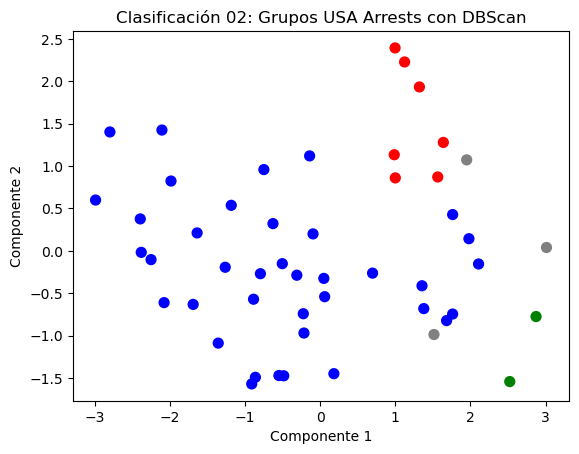

In [308]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_dbs2)
plt.title("Clasificación 02: Grupos USA Arrests con DBScan")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

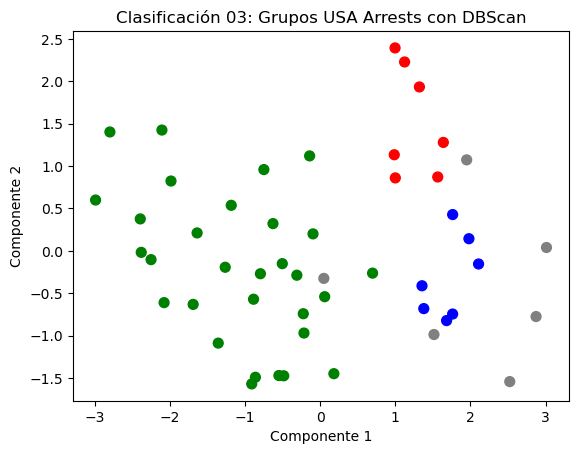

In [309]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_dbs3)
plt.title("Clasificación 03: Grupos USA Arrests con DBScan")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

### c) En caso de tener diferentes configuraciones de grupos escoja uno. Justifique su elección

In [310]:
indices_no_ruido_1 = y_dbs1 != -1
indices_no_ruido_2 = y_dbs2 != -1
indices_no_ruido_3 = y_dbs3 != -1

score = silhouette_score(
    df_usa_arrests_scaled[indices_no_ruido_1], y_dbs1[indices_no_ruido_1]
)
print("Silhouette Score Clasificación 01: ", score)
score = silhouette_score(df_usa_arrests_scaled[indices_no_ruido_2], y_dbs2[indices_no_ruido_2])
print("Silhouette Score Clasificación 02: ", score)
score = silhouette_score(df_usa_arrests_scaled[indices_no_ruido_3], y_dbs3[indices_no_ruido_3])
print("Silhouette Score Clasificación 03: ", score)

Silhouette Score Clasificación 01:  0.26109809978475834
Silhouette Score Clasificación 02:  0.2818190033918225
Silhouette Score Clasificación 03:  0.36400511639236766


De los 3 modelos usaremos la tercera Clasificación por ser el score más alto de los 3.

### d) Interprete los grupos finalmente obtenidos en términos de centro y dispersión de cada grupo

In [311]:
centroides = {}

# Iterar sobre los clusters formados (excluyendo el ruido con etiqueta -1)
for cluster_id in np.unique(y_dbs3[indices_no_ruido_3]):
    if cluster_id != -1:  # Excluir puntos de ruido
        # Seleccionar puntos que pertenecen al cluster actual
        puntos_cluster = df_usa_arrests_scaled[indices_no_ruido_3][
            y_dbs3[indices_no_ruido_3] == cluster_id
        ]

        # Calcular el promedio (centroide) de los puntos en el cluster
        centroide = np.mean(puntos_cluster, axis=0)

        # Almacenar el centroide en el diccionario
        centroides[cluster_id] = centroide

# Imprimir los centroides calculados
for cluster_id, centroide in centroides.items():
    print(f"Centroide del Cluster {cluster_id}: {centroide}")
print("WC: ", obtener_within_cluster(df_usa_arrests_scaled[indices_no_ruido_3], y_dbs3[indices_no_ruido_3]))
print(
    "Dispersión por Cluster: ",
    obtener_dispersion_por_cluster(df_usa_arrests_scaled[indices_no_ruido_3], y_dbs3[indices_no_ruido_3]),
)

Centroide del Cluster 0: Murder      1.596441
Assault     0.976068
UrbanPop   -0.785405
Rape        0.048933
dtype: float64
Centroide del Cluster 1: Murder      0.748257
Assault     1.112865
UrbanPop    0.809730
Rape        0.816199
dtype: float64
Centroide del Cluster 2: Murder     -0.652792
Assault    -0.706989
UrbanPop   -0.137713
Rape       -0.525798
dtype: float64
WC:  1708.6810894183614
Dispersión por Cluster:  [57.40061159127459, 48.22020053112023, 1603.0602772959664]


En este caso podemos ver una mejor clasificación ya que los 2 primeros clusters tienen más elementos y su dispersión es parecida

### 4. Mixtura de Gaussianos

a) Indique como especificó (ajusto) los hiperparámetros de esta técnica y obtenga los grupos considerando al menos tres conjuntos diferentes.

In [312]:
gm1 = GaussianMixture(n_components=3, random_state=0, covariance_type="full").fit(df_usa_arrests_scaled)
gm2 = GaussianMixture(n_components=3, random_state=0, covariance_type="tied").fit(
    df_usa_arrests_scaled
)
gm3 = GaussianMixture(n_components=3, random_state=0, covariance_type="spherical").fit(
    df_usa_arrests_scaled
)
print(gm1.means_)
print(gm2.means_)
print(gm3.means_)

print(gm1.covariances_)
print(gm2.covariances_)
print(gm3.covariances_)

y_gmm1 = gm1.predict(df_usa_arrests_scaled)
y_gmm2 = gm2.predict(df_usa_arrests_scaled)
y_gmm3 = gm2.predict(df_usa_arrests_scaled)

print('Número de Grupos: ',len(np.unique(y_gmm1)))
print('Número de Grupos: ',len(np.unique(y_gmm2)))
print('Número de Grupos: ',len(np.unique(y_gmm3)))


[[ 1.02080312  1.05985264  0.17560024  0.87044463]
 [-0.77414442 -0.28795792  0.79974204 -0.0843705 ]
 [-0.58994273 -0.7362658  -0.32531563 -0.64118599]]
[[ 1.03315752  1.04725058  0.19580739  0.85674946]
 [-0.40284257 -0.39731831  0.3138519  -0.26666653]
 [-1.15889365 -1.19590101 -0.97030966 -1.09066643]]
[[ 0.9506094   0.96585518  0.14787226  0.78410798]
 [-0.51790881 -0.51474345  0.36026213 -0.3459417 ]
 [-1.14585767 -1.19123646 -1.21585757 -1.13641385]]
[[[ 0.3796053   0.02432085 -0.29811512 -0.28890962]
  [ 0.02432085  0.25683216 -0.03258152 -0.0322633 ]
  [-0.29811512 -0.03258152  0.99216802  0.42922893]
  [-0.28890962 -0.0322633   0.42922893  0.81348409]]

 [[ 0.05284448  0.02707058 -0.05152374  0.01725429]
  [ 0.02707058  0.49191176 -0.13872174 -0.15195317]
  [-0.05152374 -0.13872174  0.2321742  -0.25582548]
  [ 0.01725429 -0.15195317 -0.25582548  0.55585472]]

 [[ 0.41503348  0.26866449  0.19844012  0.27331982]
  [ 0.26866449  0.27108156  0.25004834  0.21239648]
  [ 0.19844012

In [313]:
df_usa_arrests_scaled_gmm = df_usa_arrests_scaled.copy()
df_usa_arrests_scaled_gmm["GMM1"] = y_gmm1
df_usa_arrests_scaled_gmm["GMM2"] = y_gmm2
df_usa_arrests_scaled_gmm["GMM3"] = y_gmm3

b) Visualizar los grupos a partir de las primeras dos componentes principales.

In [314]:
colors = {-1: "gray", 0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "violet"}

color_gmm1 = df_usa_arrests_scaled_gmm.GMM1.map(colors)
color_gmm2 = df_usa_arrests_scaled_gmm.GMM2.map(colors)
color_gmm3 = df_usa_arrests_scaled_gmm.GMM3.map(colors)

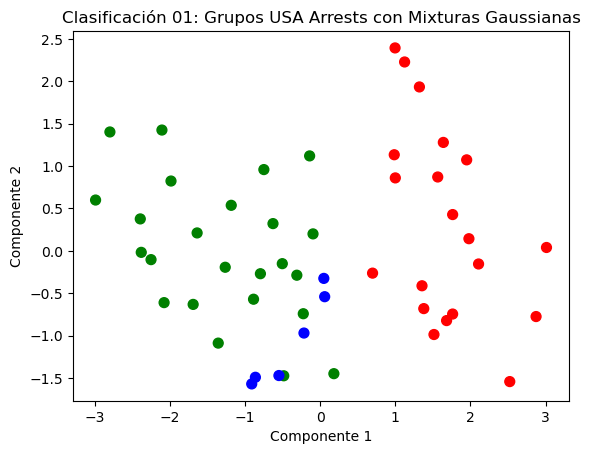

In [315]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_gmm1)
plt.title("Clasificación 01: Grupos USA Arrests con Mixturas Gaussianas")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

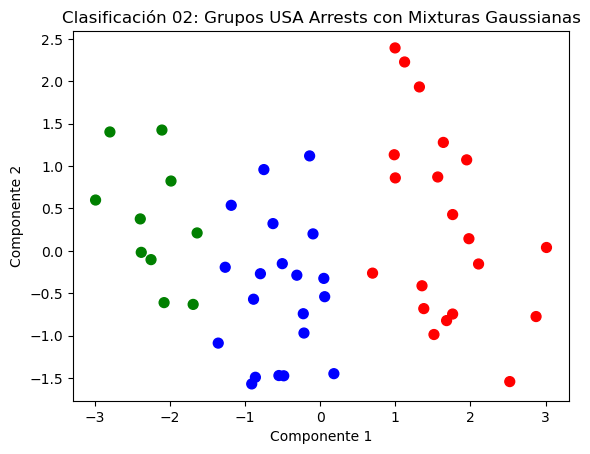

In [316]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_gmm2)
plt.title("Clasificación 02: Grupos USA Arrests con Mixturas Gaussianas")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

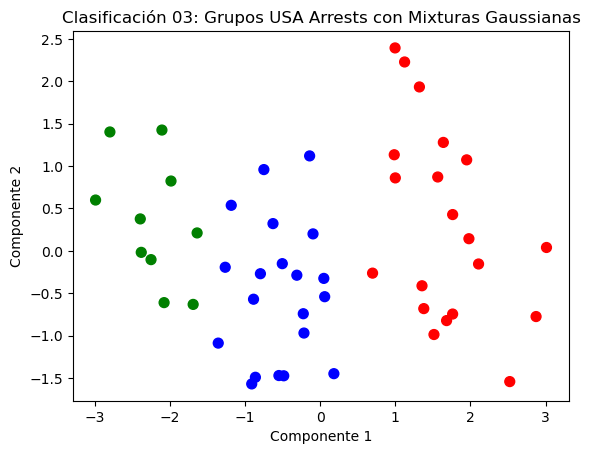

In [317]:
plt.scatter(proyecciones["PC1"], proyecciones["PC2"], s=50, c=color_gmm3)
plt.title("Clasificación 03: Grupos USA Arrests con Mixturas Gaussianas")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

c) En caso de tener diferentes configuraciones de grupos escoja uno. Justifique su elección

In [318]:
score = silhouette_score(df_usa_arrests_scaled, y_gmm1)
print("Silhouette Score Clasificación 01: ", score)
score = silhouette_score(df_usa_arrests_scaled, y_gmm2)
print("Silhouette Score Clasificación 02: ", score)
score = silhouette_score(df_usa_arrests_scaled, y_gmm3)
print("Silhouette Score Clasificación 03: ", score)

Silhouette Score Clasificación 01:  0.21318309527193022
Silhouette Score Clasificación 02:  0.3147737624768203
Silhouette Score Clasificación 03:  0.3147737624768203


De los 3 modelos en donde solo cmabiamos el hiperparámetro del tipod e covarianza los que arrojan mejor resultado son todos menos el full.

d) Interprete los grupos finalmente obtenidos en términos de centro y dispersión de cada grupo

In [319]:
print("Promedios o Centroides: ", gm3.means_)
print(
    " Dispersión de los clusters: ",
    obtener_within_cluster(df_usa_arrests_scaled, y_gmm3),
)
print(" Dispersión por Cluster: ", obtener_dispersion_por_cluster(df_usa_arrests_scaled, y_gmm3))

Promedios o Centroides:  [[ 0.9506094   0.96585518  0.14787226  0.78410798]
 [-0.51790881 -0.51474345  0.36026213 -0.3459417 ]
 [-1.14585767 -1.19123646 -1.21585757 -1.13641385]]
 Dispersión de los clusters:  1483.7572710625057
 Dispersión por Cluster:  [793.4764731836796, 582.0979936352381, 108.18280424358805]


En este caso vemos una mejor clasificación en el sentido de que cada cluster tiene una dispersión similar y baja

### 5. ¿Cuál de las 3 técnicas escogería usted?, base su respuesta con algún indicador apropiado

En este caso para cada tipo de modelo se escogió el que mejor Silhouette Score tuvo, hay que recordar que para este caso se buscaron una clasificación de 3 grupos o más. Ahora compararemos la dispersión de sus Clusters.

In [320]:
print("WC MeanShift: ", obtener_within_cluster(df_usa_arrests_scaled, y_ms2))
print(
    "Dispersión por Cluster MeanShift: ",
    obtener_dispersion_por_cluster(df_usa_arrests_scaled, y_ms2),
)
print(
    "WC DBScan: ",
    obtener_within_cluster(
        df_usa_arrests_scaled[indices_no_ruido_3], y_dbs3[indices_no_ruido_3]
    ),
)
print(
    "Dispersión por Cluster DBScan: ",
    obtener_dispersion_por_cluster(
        df_usa_arrests_scaled[indices_no_ruido_3], y_dbs3[indices_no_ruido_3]
    ),
)
print(
    "WC Mixturas Gaussianas: ",
    obtener_within_cluster(df_usa_arrests_scaled, y_gmm3),
)
print(
    "Dispersión por Cluster Mixturas Gaussianas: ",
    obtener_dispersion_por_cluster(df_usa_arrests_scaled, y_gmm3),
)

WC MeanShift:  2285.2393872242505
Dispersión por Cluster MeanShift:  [1596.7395787013695, 688.499808522881, 0.0]
WC DBScan:  1708.6810894183614
Dispersión por Cluster DBScan:  [57.40061159127459, 48.22020053112023, 1603.0602772959664]
WC Mixturas Gaussianas:  1483.7572710625057
Dispersión por Cluster Mixturas Gaussianas:  [793.4764731836796, 582.0979936352381, 108.18280424358805]


Y como conclusión podemos ver que el MeanShift tiene un WC muy alto en comparación con el resto, y también sus clusters están muy desbalanceados, el DBScan sería una solución intermedia, pero el que mejor resultado nos da es el modelo de Mixtura de Gaussianos con el tipo de covarianza "spherical", ya que presenta menor WC y sus clusters están mejor balanceados que el de los otros modelos.